## Data analysis with Scikit-learn and astroML

[scikit-learn](https://scikit-learn.org) is a set of general machine learning libraries written in Python

`` pip install -U scikit-learn ``

`` conda install scikit-learn ``

[astroML](https://astroML.org) is a set of machine Learning libraries written in Python aimed at astronomical problems

``pip install --pre --upgrade astroML``

They provide opensource, simple and efficient tools to use (they dont always scale to very large data sets). They are built on Numpy, Astropy, SciPy, and matplotlib and have similar interfaces so you can learn one routine and understand how to call many of the other packages

## Let's start with the simplest data analysis task - regression


Note: we will only touch briefly on the statistics behind regression and instead will focus on calling scikit-learn and astroML

## A matrix formalism provides a simplified approach to regression techniques

In general the simplest approach for regression is to think of it in terms of vectors and matrices

> $Y= M \theta$

$Y$ is an $N$-dimensional vector of values ${y_i}$,
>$Y=\left[
\begin{array}{c}
y_0\\
.\\
y_{N-1}
\end{array}
\right].
$

For the straight line $\theta$ is simply a two-dimensional
vector of regression coefficients,
>$
\theta=\left[
\begin{array}{c}
\theta_0\\
\theta_1
\end{array}
\right],
$

 $M$ is a called the design matrix
>$
M=\left[
\begin{array}{cc}
1 & x_0\\
.&.\\
1&x_{N-1}
\end{array}
\right]
$

the constant in the first column of $M$ captures the zeropoint in the regression 

For heteroscedastic uncertainties (uncertainties that are different for each point)  we can define a covariance matrix

>$C=\left[
\begin{array}{cccc}
\sigma_{0}^2 & 0 & . & 0 \\
. & . & . & . \\
0 & 0 & . & \sigma_{N-1}^2 \\
\end{array}
\right]
$

and the maximum likelihood solution for the regression is

> $\theta = (M^T C^{-1} M)^{-1} (M^T C^{-1} Y)$

which minimizes the sum of squares and gives uncertainties on $\theta$ 

> $\Sigma_\theta =
\left[
\begin{array}{cc}
\sigma_{\theta_0}^2 & \sigma_{\theta_0\theta_1} \\
\sigma_{\theta_0\theta_1} & \sigma_{\theta_1}^2
\end{array}
\right]
= [M^T C^{-1} M]^{-1}.
$


With numpy it is straightforward to develop matrices and, as long as they can be inverted, calculate the  regression coefficients

### Lets try this on a simulated sample of data 
We will model the distance of SN (for a particular cosmology) as a function of redshift. Initially we will just fit the relation as a straight line 


Scikit-learn and astroML have a common API

Define the function you want to use

`clf = LinearRegression()`

Fit the model to the data

`clf.fit(z_sample[:,None], mu_sample, dmu)`

Predict what the model will generate given a new set of data

`mu_fit = clf.predict(z[:, None])`




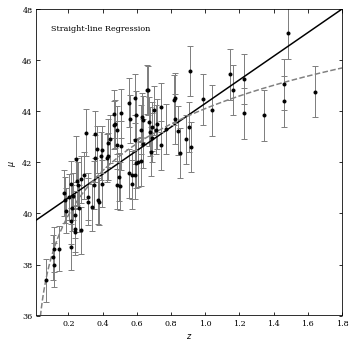

In [2]:
%matplotlib inline
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astropy import cosmology
from astroML.datasets import generate_mu_z
from astroML.linear_model import LinearRegression

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Generate data
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=0)

cosmo = cosmology.FlatLambdaCDM(71, 0.27, Tcmb0=0)
z = np.linspace(0.01, 2, 1000)
mu_true = cosmo.distmod(z)

#------------------------------------------------------------
# Define our classifiers
text = ['Straight-line Regression',]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(left=0.1, right=0.95,
                    bottom=0.1, top=0.95,
                    hspace=0.05, wspace=0.05)


ax = fig.add_subplot(111)

# fit the data
clf = LinearRegression()
clf.fit(z_sample[:,None], mu_sample, dmu)


mu_sample_fit = clf.predict(z_sample[:, None])
mu_fit = clf.predict(z[:, None])

#plot results
ax.plot(z, mu_fit, '-k')
ax.plot(z, mu_true, '--', c='gray')
ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)

ax.set_xlim(0.01, 1.8)
ax.set_ylim(36.01, 48)
ax.text(0.05, 0.95, text[0], ha='left', va='top',
            transform=ax.transAxes)


ax.set_ylabel(r'$\mu$')
ax.set_xlabel(r'$z$')

plt.show()

## Multivariate regression

Here we fit a hyperplane rather than a straight line

> $y_i =\theta_0 + \theta_1x_{i1} + \theta_2x_{i2} +
 \cdots +\theta_kx_{ik} + \epsilon_i$
 
 The design matrix, $M$, is now
 
> $M = \left(
\begin{array}{ccccccc}
1 & x_{01} & x_{02} & . & x_{0k}\\
1 & x_{11} & x_{12} & . & x_{1k}\\
. & . & . & .  & . \\
1 & x_{N1} & x_{N2} & . & x_{Nk}\\
\end{array}
\right)$

but the whole formalism is the same as before

## Basis function regression

If we consider a function in terms of the sum of bases (this can be polynomials, Gaussians, quadratics, cubics) then we can solve for the coefficients using regression. For polynomials,

> $M = \left(
\begin{array}{cccc}
1 & x_{0} & x_{0}^2 & x_{0}^3 \\
1 & x_{1} & x_{1}^2 & x_{1}^3\\
. & . & . & .  \\
1 & x_{N} & x_{N}^2 &  x_{N}^3\\
\end{array}
\right)$

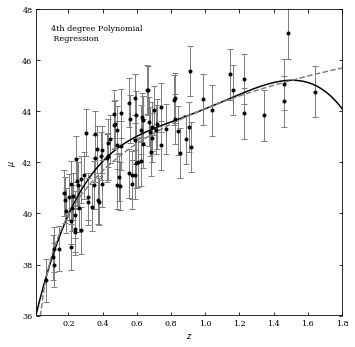

In [6]:
from astroML.linear_model import PolynomialRegression

# Define our classifiers
text = ['4th degree Polynomial\n Regression']

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(left=0.1, right=0.95,
                    bottom=0.1, top=0.95,
                    hspace=0.05, wspace=0.05)


ax = fig.add_subplot(111)

# fit the data
clf = PolynomialRegression(degree=5)
clf.fit(z_sample[:, None], mu_sample, dmu)

mu_sample_fit = clf.predict(z_sample[:, None])
mu_fit = clf.predict(z[:, None])

ax.plot(z, mu_fit, '-k')
ax.plot(z, mu_true, '--', c='gray')
ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)

ax.set_xlim(0.01, 1.8)
ax.set_ylim(36.01, 48)
ax.text(0.05, 0.95, text[0], ha='left', va='top', transform=ax.transAxes)

ax.set_ylabel(r'$\mu$')
ax.set_xlabel(r'$z$')

plt.show()

but we could substitute $x_{0}^2$ etc for Gaussians (where we fix $\sigma$ and $\mu$ and fit for the amplitude) as long as the attribute we are fitting for is linear. This is called basis function regression

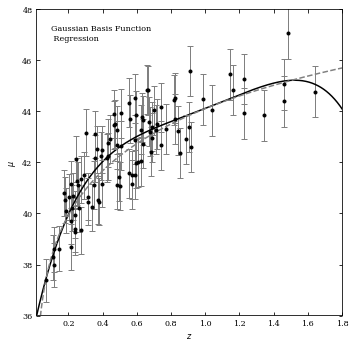

In [28]:
from astroML.linear_model import BasisFunctionRegression
#------------------------------------------------------------
# Define our number of Gaussians
nGaussians = 5
basis_mu = np.linspace(0, 2, nGaussians)[:, None]
basis_sigma = 3 * (basis_mu[1] - basis_mu[0])

text = ['Gaussian Basis Function\n Regression',]


#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(left=0.1, right=0.95,
                    bottom=0.1, top=0.95,
                    hspace=0.05, wspace=0.05)

ax = fig.add_subplot(111)

# fit the data
clf = BasisFunctionRegression('gaussian', mu=basis_mu, sigma=basis_sigma)
clf.fit(z_sample[:, None], mu_sample, dmu)

mu_sample_fit = clf.predict(z_sample[:, None])
mu_fit = clf.predict(z[:, None])


ax.plot(z, mu_fit, '-k')
ax.plot(z, mu_true, '--', c='gray')
ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)

ax.set_xlim(0.01, 1.8)
ax.set_ylim(36.01, 48)
ax.text(0.05, 0.95, text[0], ha='left', va='top', transform=ax.transAxes)

ax.set_ylabel(r'$\mu$')
ax.set_xlabel(r'$z$')

plt.show()

### Exercise - how many polynomial terms (or Gaussians do we need to best fit the data)

Increase the number of terms that we use to fit the data and plot the results until you are happy. Calculate the rms error (between the data `mu_sample` and the fit `mu_sample_fit`)

Generate another set of input data and apply the model to these data. Is the rms the same? Why?


In [29]:
def rms(N, real, fit):
    return np.sqrt((1/N)*np.sum((real - fit)**2))

rms(len(mu_sample), mu_sample, mu_sample_fit)

0.9296524411414074

In [40]:
def rms_test(num_gauss, matrix):
    nGaussians = num_gauss
    basis_mu = np.linspace(0, 2, nGaussians)[:, None]
    basis_sigma = 3 * (basis_mu[1] - basis_mu[0])
    clf = BasisFunctionRegression('gaussian', mu=basis_mu, sigma=basis_sigma)
    clf.fit(z_sample[:, None], mu_sample, dmu)
    mu_sample_fit = clf.predict(z_sample[:, None])
    mu_fit = clf.predict(z[:, None])
    rms_val = rms(len(mu_sample), mu_sample, mu_sample_fit)
    np.append(matrix, rms_val)

rms_values = []
num_gauss = [2,3,4,5,6,7,8,9,10]

for i in num_gauss:
    rms_test(i, rms_values)

In [41]:
rms_values

[]

## Cross-validation

As the complexity of a model increases the data points fit the model more and more closely. 

This does not result in a better fit to the data. We are overfitting the data (the model has high variance - a small change in a training point can change the model dramatically).  

We can evaluate this using a training set (50-70% of sample),  a cross-validation set (15-25%) and a test set (15-25%)

Cross-validation set evaluates the cross-validation error $\epsilon_{\rm cv}$ of the model (large for overfit models). 

Test error gives an estimate of the reliability of the model.

We can define a cross validation error
>$\epsilon_{\rm cv}^{(n)} = \sqrt{\frac{1}{n}\sum_{i=1}^{N_{\rm cv}}
  \left[y_i - \sum_{m=0}^d \theta_0^{(n)}x_i^m\right]}$

where we train on the first $n$ points ($\le N_{\rm train}$) and evaluate the error on the $N_{\rm cv}$ cross validation points.

/Users/ridder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RankWarning: Polyfit may be poorly conditioned
/Users/ridder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RankWarning: Polyfit may be poorly conditioned
/Users/ridder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RankWarning: Polyfit may be poorly conditioned


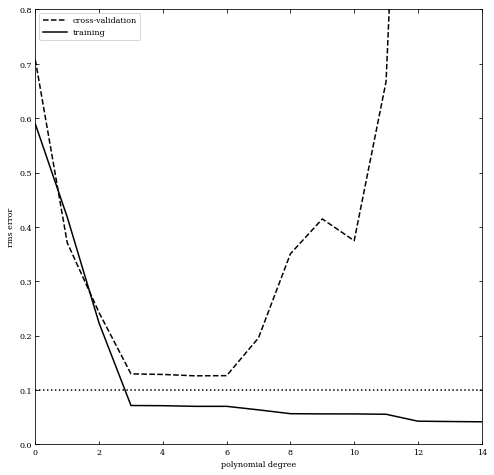

In [42]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker
from matplotlib.patches import FancyArrow


#------------------------------------------------------------
# Define our functional form
def func(x, dy=0.1):
    return np.random.normal(np.sin(x) * x, dy)

#------------------------------------------------------------
# select the (noisy) data
np.random.seed(0)
x = np.linspace(0, 3, 22)[1:-1]
dy = 0.1
y = func(x, dy)

#------------------------------------------------------------
# Select the cross-validation points
np.random.seed(1)
x_cv = 3 * np.random.random(20)
y_cv = func(x_cv)

x_fit = np.linspace(0, 3, 1000)



#------------------------------------------------------------
# Third figure: plot errors as a function of polynomial degree d
d = np.arange(0, 21)
training_err = np.zeros(d.shape)
crossval_err = np.zeros(d.shape)

fig = plt.figure(figsize=(8, 8))
for i in range(len(d)):
    p = np.polyfit(x, y, d[i])
    training_err[i] = np.sqrt(np.sum((np.polyval(p, x) - y) ** 2)
                              / len(y))
    crossval_err[i] = np.sqrt(np.sum((np.polyval(p, x_cv) - y_cv) ** 2)
                              / len(y_cv))


ax = fig.add_subplot(111)
ax.plot(d, crossval_err, '--k', label='cross-validation')
ax.plot(d, training_err, '-k', label='training')
ax.plot(d, 0.1 * np.ones(d.shape), ':k')

ax.set_xlim(0, 14)
ax.set_ylim(0, 0.8)

ax.set_xlabel('polynomial degree')
ax.set_ylabel('rms error')
ax.legend(loc=2)



plt.show()

_Twofold cross-validation_

We split the data into a training set $d_1$, a cross-validation
set $d_2$, and a test set $d_0$.  

For twofold cross-validation train on $d_1$ and cross-validate on $d_0$.  

The training error and cross-validation
error are computed from the mean of the errors in each fold.

This leads to more robust determination
of the cross-validation error for smaller data sets.

## Regularization

If we progressively increase the number of terms in the fit we reach a regime where we are overfitting the data (i.e. there are not enough degrees of freedom)

For cases where we are concerned with overfitting we can apply constraints (usually of smoothness, number of coefficients, size of coefficients).

> ($Y - M \theta)^T(Y- M \theta) + \lambda |\theta^T \theta|$

with $\lambda$ the regularization parameter

This leads to a solution for the parameters of the model

> $\theta = (M^T C^{-1} M + \lambda I)^{-1} (M^T C^{-1} Y)$

with $I$ the identity model

### Ridge (Tikhonov) regularization

> $ |\theta |^2 < s$

penalty is on the sum of the squares of the regression coefficients

This penalizes the size of the coefficients

Number of coefficient 100 100
Number of coefficient 100 100


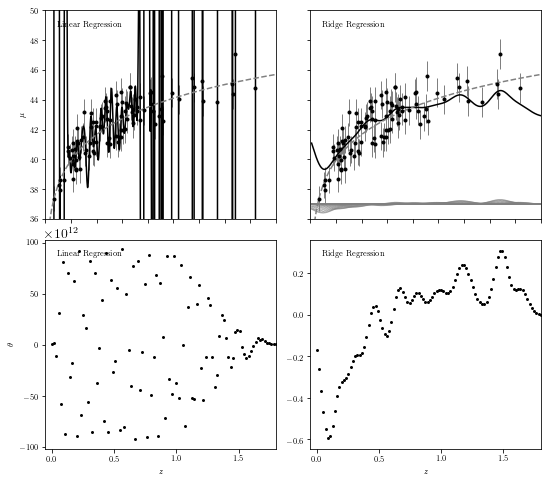

In [30]:
from sklearn.linear_model import LinearRegression, Ridge

#------------------------------------------------------------
# Manually convert data to a gaussian basis
#  note that we're ignoring errors here, for the sake of example.
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

nGaussians=100
centers = np.linspace(0, 1.8, nGaussians)
widths = 3 * (centers[1] - centers[0])
X = gaussian_basis(z_sample[:, np.newaxis], centers, widths)

#------------------------------------------------------------
# Set up the figure to plot the results
fig = plt.figure(figsize=(12, 7))
fig.subplots_adjust(left=0.07, right=0.95,
                    bottom=0.08, top=0.95,
                    hspace=0.1, wspace=0.15)

lamVal=9
classifier = [LinearRegression, Ridge]
kwargs = [dict(), dict(alpha=lamVal), ]
labels = ['Linear Regression', 'Ridge Regression', ]

for i in range(2):
    clf = classifier[i](fit_intercept=True, **kwargs[i])
    clf.fit(X, mu_sample)
    w = clf.coef_
    fit = clf.predict(gaussian_basis(z[:, None], centers, widths))

    # plot fit
    ax = fig.add_subplot(231 + i)
    ax.xaxis.set_major_formatter(plt.NullFormatter())

    # plot curves for regularized fits
    if i == 0:
        ax.set_ylabel('$\mu$')
    else:
        ax.yaxis.set_major_formatter(plt.NullFormatter())
        curves = 37 + w * gaussian_basis(z[:, np.newaxis], centers, widths)
        curves = curves[:, abs(w) > 0.01]
        ax.plot(z, curves,
                c='gray', lw=1, alpha=0.5)

    ax.plot(z, fit, '-k')
    ax.plot(z, mu_true, '--', c='gray')
    ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
    ax.set_xlim(0.001, 1.8)
    ax.set_ylim(36, 50)
    ax.text(0.05, 0.95, labels[i],
            ha='left', va='top',
            transform=ax.transAxes)

    # plot weights
    ax = plt.subplot(234 + i)
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.set_xlabel('$z$')
    if i == 0:
        ax.set_ylabel(r'$\theta$')
        w *= 1E-12
        ax.text(0, 1.01, r'$\rm \times 10^{12}$',
                transform=ax.transAxes, fontsize=14)
    ax.scatter(centers, w, s=9, lw=0, c='k')

    ax.set_xlim(-0.05, 1.8)

    #ax.set_ylim(-2, 4)

    ax.text(0.05, 0.95, labels[i],
            ha='left', va='top',
            transform=ax.transAxes)
    print ("Number of coefficient",len(clf.coef_),len(np.where(np.abs(clf.coef_) > 0.)[0]))

plt.show()

### Non-Linear Regression

The linear-regression techniques assume that the regression coefficients scale linearly. In many cases this is not true. 

Initial approaches to non-linear functions typically resort to transforming the data (e.g. logs and magnitudes). 

An alternate approach is to use the Levenberg-Marquardt (LM) algorithm to optimize the maximum likelihood estimation. LM searches through a combination of gradient descent and Gauss-Newton optimization. If we can express our
regression function as a Taylor series expansion then, to first order,
we can write

> $f(x_i|\theta) = f(x_i|\theta_0) + J d\theta$

where $\theta_0$ is an initial guess for the regression parameters,
$J$ is the Jacobian about this point ($J=\partial f(x_i|\theta)/ \partial
 \theta$), and $d\theta$ is a small change in the regression
parameters. 

LM minimizes the sum of square errors,

> $\sum_i (y_i- f(x_i|\theta_0) - J_i d\theta)^2$

for the perturbation $d\theta$. This results in an update relation for
$d\theta$ of

> $(J^TC^{-1}J + \lambda\ {\rm diag}(J^TC^{-1}J) )\,d\theta = J^TC^{-1}(Y-f(X|\theta))$

$\lambda$ term acts as a damping parameter.  For small $\lambda$ the relation approximates a Gauss-Newton method (i.e.,
it minimizes the parameters assuming the function is quadratic). For
large $\lambda$ the perturbation $d\theta$ follows the direction of
steepest descent. The diag$(J^TC^{-1}J)$ term, as opposed to the
identity matrix used in ridge regression, ensures that the update of
$d\theta$ is largest along directions where the gradient is smallest (which
improves convergence).


_In SciPy scipy.optimize.leastsq implements the LM algorithm_

@pickle_results: using precomputed results from 'mu_z_nonlinear.pkl'


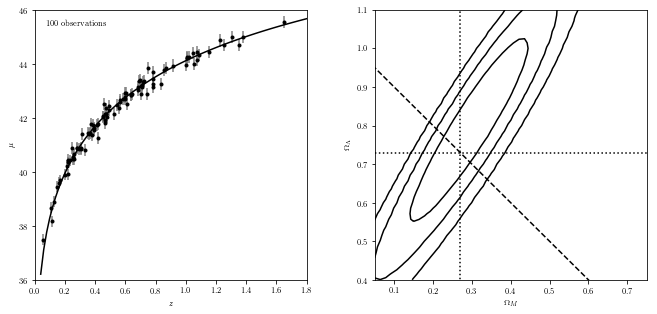

In [39]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from astropy.cosmology import LambdaCDM

from astroML.datasets import generate_mu_z
from astroML.plotting.mcmc import convert_to_stdev
from astroML.utils.decorators import pickle_results

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate the data
z_sample, mu_sample, dmu = generate_mu_z(100, z0=0.3,
                                         dmu_0=0.05, dmu_1=0.004,
                                         random_state=1)


#------------------------------------------------------------
# define a log likelihood in terms of the parameters
#  beta = [omegaM, omegaL]
def compute_logL(beta):
    cosmo = LambdaCDM(H0=71, Om0=beta[0], Ode0=beta[1], Tcmb0=0)
    mu_pred = cosmo.distmod(z_sample).value
    return - np.sum(0.5 * ((mu_sample - mu_pred) / dmu) ** 2)


#------------------------------------------------------------
# Define a function to compute (and save to file) the log-likelihood
@pickle_results('mu_z_nonlinear.pkl')
def compute_mu_z_nonlinear(Nbins=50):
    omegaM = np.linspace(0.05, 0.75, Nbins)
    omegaL = np.linspace(0.4, 1.1, Nbins)

    logL = np.empty((Nbins, Nbins))

    for i in range(len(omegaM)):
        for j in range(len(omegaL)):
            logL[i, j] = compute_logL([omegaM[i], omegaL[j]])

    return omegaM, omegaL, logL


omegaM, omegaL, res = compute_mu_z_nonlinear()
res -= np.max(res)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25,
                    bottom=0.15, top=0.9)

# left plot: the data and best-fit
ax = fig.add_subplot(121)
whr = np.where(res == np.max(res))
omegaM_best = omegaM[whr[0][0]]
omegaL_best = omegaL[whr[1][0]]
cosmo = LambdaCDM(H0=71, Om0=omegaM_best, Ode0=omegaL_best, Tcmb0=0)

z_fit = np.linspace(0.04, 2, 100)
mu_fit = cosmo.distmod(z_fit).value

ax.plot(z_fit, mu_fit, '-k')
ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray')

ax.set_xlim(0, 1.8)
ax.set_ylim(36, 46)

ax.set_xlabel('$z$')
ax.set_ylabel(r'$\mu$')

ax.text(0.04, 0.96, "%i observations" % len(z_sample),
        ha='left', va='top', transform=ax.transAxes)

# right plot: the likelihood
ax = fig.add_subplot(122)

ax.contour(omegaM, omegaL, convert_to_stdev(res.T),
           levels=(0.683, 0.955, 0.997),
           colors='k')

ax.plot([0, 1], [1, 0], '--k')
ax.plot([0, 1], [0.73, 0.73], ':k')
ax.plot([0.27, 0.27], [0, 2], ':k')

ax.set_xlim(0.05, 0.75)
ax.set_ylim(0.4, 1.1)

ax.set_xlabel(r'$\Omega_M$')
ax.set_ylabel(r'$\Omega_\Lambda$')

plt.show()